In [1]:
using Distributions, Plots
pyplot(fmt=:svg)
x ⪅ y = x < y || x ≈ y

chisq(a, b, c, d) = (a + b + c + d)*(a*d - b*c)^2/((a + b)*(c + d)*(a + c)*(b + d))
pval_chisq(a, b, c, d) = ccdf(Chisq(1), chisq(a, b, c, d))

function pval_fisher(a, b, c, d)
    hg = Hypergeometric(a + b, c + d, a + c)
    p0 = pdf(hg, a)
    sum(pdf(hg, x) for x in support(hg) if pdf(hg, x) ⪅ p0)
end

pdfbin(r, s, p, q, (x, y)) = pdf(Binomial(r, p), x) * pdf(Binomial(s, q), y)
supportbin(r, s, p, q) = Iterators.product(support(Binomial(r, p)), support(Binomial(s, q)))
prob_alphaerror(pval, α, r, s, p, q) = sum(pdfbin(r, s, p, q, (a, c))
    for (a, c) in supportbin(r, s, p, q) if pval(a, r-a, c, s-c) < α; init=0.0)

prob_alphaerror (generic function with 1 method)

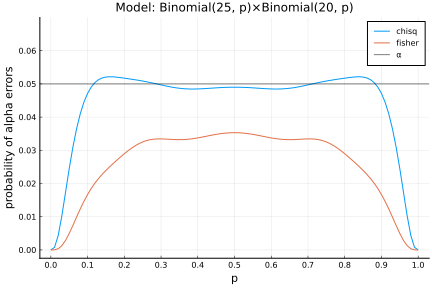

In [13]:
α = 0.05
p = 0:0.01:1
r, s = 25, 20
pae_chisq = prob_alphaerror.(pval_chisq, α, r, s, p, p)
pae_fisher = prob_alphaerror.(pval_fisher, α, r, s, p, p)

plot(; title="Model: Binomial($r, p)×Binomial($s, p)", titlefontsize=12)
plot!(p, pae_chisq; label="chisq")
plot!(p, pae_fisher; label="fisher")
hline!([α]; color=:black, label="α", alpha=0.5)
plot!(; ylim=(-0.05α, 1.4α), ylabel="probability of alpha errors")
plot!(; xtick=0:0.1:1, xlabel="p")

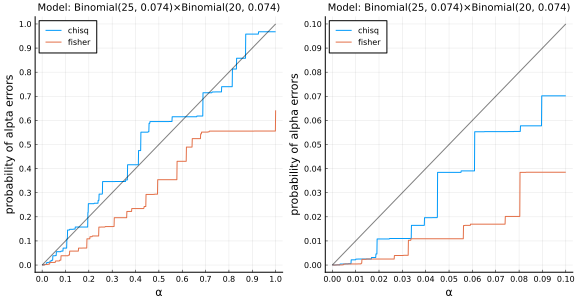

In [16]:
a, b, c, d = 1, 5, 24, 15
r, s = a+c, b+d
p = (a+b)*(a+c)/(a+b+c+d)^2
pp = round(p; digits=3)

α = 0:0.001:1
pae_chisq = prob_alphaerror.(pval_chisq, α, r, s, p, p)
pae_fisher = prob_alphaerror.(pval_fisher, α, r, s, p, p)

P = plot(; title="Model: Binomial($r, $pp)×Binomial($s, $pp)", titlefontsize=10)
plot!(α, pae_chisq; label="chisq")
plot!(α, pae_fisher; label="fisher")
plot!([0, 1], [0, 1]; color=:black, label="", alpha=0.5, legend=:topleft)
plot!(; ytick=0:0.1:1, ylabel="probability of alpta errors")
plot!(; xtick=0:0.1:1, xlabel="α")

α = 0:0.0001:0.1
pae_chisq = prob_alphaerror.(pval_chisq, α, r, s, p, p)
pae_fisher = prob_alphaerror.(pval_fisher, α, r, s, p, p)

Q = plot(; title="Model: Binomial($r, $pp)×Binomial($s, $pp)", titlefontsize=10)
plot!(α, pae_chisq; label="chisq")
plot!(α, pae_fisher; label="fisher")
plot!([0, 0.1], [0, 0.1]; color=:black, label="", alpha=0.5, legend=:topleft)
plot!(; ytick=0:0.01:0.1, ylabel="probability of alpha errors")
plot!(; xtick=0:0.01:0.1, xlabel="α")

plot(P, Q; size=(800, 420))